# Web Scraping Apartments

## General Approach

If not all data is in tables, we can use web scraping to extract the data from the website. In this notebook, we will scrape the data from the website of a general marketplace ss.com . We will extract the data and store it in a pandas DataFrame.

## Steps

1. We will use the requests library to get the HTML code of the website. HTML is just structured text.
2. We will use the BeautifulSoup library to parse the HTML code into a tree structure.
3. We will extract the data from the HTML code. We will use BeautifulSoup to find the data we need.
4. We will store the data in a pandas DataFrame.
5. We will clean the data. - optionally
6. We will save the data in a CSV or XLSX or JSON file.


In [1]:
# first we load libraries
# let's start with standard libraries
# we will use time to pause between requests - good practice
import time
# we will use datetime to get the current date and time for custom file names
from datetime import datetime

# we will need requests to get the data from the web
import requests

# we will want BeautifulSoup to parse the data
from bs4 import BeautifulSoup
# if you dot have BeautifulSoup installed, you can install it with pip install beautifulsoup4
# official BeautifulSoup documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
# in our case pip install pandas[html] will install BeautifulSoup as well	

# we will need pandas to manipulate the data - once we have it
import pandas as pd
# pandas version
print(f"pandas version: {pd.__version__}")

pandas version: 2.2.2


In [2]:
# now we just need a url to scrape
url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
print(f"Will open the following url: {url}")

Will open the following url: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/


In [3]:
# now we will request the data from the web
response = requests.get(url)
# check response and raise error if it is not 200
if response.status_code != 200:
    raise Exception(f"Failed to load page, status code: {response.status_code}")
else:
    print(f"Page {url} loaded successfully")

Page https://www.ss.com/lv/real-estate/flats/riga/centre/sell/ loaded successfully


In [4]:
# now we have ALL the data for the page in our memory
# let's look at first 100 characters of text
print(response.text[:100])

<!DOCTYPE html>
<HTML lang="lv"><HEAD>
<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Slu


In [7]:
# we could parse our html by hand but it would be quite painful and unnecessary
# for example I could find where Valdemāra is mentioned
valdemara = response.text.find("Valdemāra")
print(f"Valdemāra is mentioned at position {valdemara}")
# i could print some 60 characters around it
print(response.text[valdemara-30:valdemara+30])
# so it is possible but too slow and error prone

Valdemāra is mentioned at position 17057
</option><option value="4545">Valdemāra</option><option valu


## Making soup out of HTML

Instead we will BeautifulSoup library to parse the HTML code. We will extract the data from the HTML code. We will use BeautifulSoup to find the data we need.

In [8]:
# so we will make soup out of response
soup = BeautifulSoup(response.text, 'lxml') # we do not have to specify parser 
#but lxml is considered better than default html.parser
# if you do not have lxml installed, you can install it with pip install lxml
# alternatively you could just use the default parser
# soup = BeautifulSoup(response.text)
# print title of page
print(soup.title)

<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>


In [9]:
# let's get a table row headline
# notice that tr element has an id of head_line
# id attributes are supposed to be unique
# we can use this to find our row
headline_row = soup.find("tr", {"id": "head_line"})
# so we passed two arguments to find
# first is the name of the tag we are looking for  
# second is a dictionary of attributes we are looking for
print(headline_row)
# in this case I bypassed the need to look for specific table since I alread know the id


<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title

In [11]:
# now we could find all td - table data elements in the row
# td docs: https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td
table_data = headline_row.find_all("td")
# how many
print(f"Found {len(table_data)} table data elements")
# print last two
print(table_data[-2:])

Found 8 table data elements
[<td background="https://i.ss.com/img/pl.gif" class="msg_column" nowrap="" style="border-left:1px #FFFFFF solid;"><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4bRDwT.html" rel="nofollow">Cena, m2</a></noindex></td>, <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4belM=.html" rel="nofollow" title="">Cena</a></noindex></td>]


In [13]:
# now let's extract all text from each td
# we can use simple list comprehension
# table_data_text = [td.text for td in table_data]
# again we could have done this with for loop
table_data_text = []
for td in table_data:
    table_data_text.append(td.text.strip())
print(table_data_text)
# well the first element is kind of useless we would want the rest

['Sludinājumi\r\n\n\n\ndatums', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena']


In [28]:
# let's write a function that will get soup as parameter and return a list of column names
# also we will provide three more parameters
# id to use to find the row
# how many columns to skip
# and a tuple of column names to start with
def get_column_names(soup, id="head_line", skip=1, start=("URL", "Description")):
    # find the row
    headline_row = soup.find("tr", {"id": id})
    # check that we found the row
    if headline_row is None:
        raise Exception(f"Failed to find row with id: {id}")
    # find all table data elements
    table_data = headline_row.find_all("td")
    # extract text
    table_data_text = [td.text.strip() for td in table_data]
    # return the list of column names
    return start + tuple(table_data_text[skip:]) # we could have made start list and then used start.extend(table_data_text[skip:])

# let's test our function on our soup
column_names = get_column_names(soup)
print(column_names)

('URL', 'Description', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena')


In [17]:
# now we want to gather all table rows that have id that starts with tr_
# first we get all table rows
all_rows = soup.find_all("tr")
# how many
print(f"Found {len(all_rows)} rows")

Found 39 rows


In [19]:
# now let's filter those rows that have id starting with tr_
# lets start with loop solution
apartment_rows = []
for row in all_rows:
    if row.get("id", "").startswith("tr_"):
    # id attribute is not guaranteed
    # so get is better than direct access
    # then we can always use startswith method
        # we will add one more check
        # we only want those rows that do not start with tr_bnr
        # those are banners and we are not interested in them
        if not row.get("id", "").startswith("tr_bnr"):
            apartment_rows.append(row)
# how many
print(f"Found {len(apartment_rows)} apartment rows")

Found 30 apartment rows


In [20]:
# let's analyze the first row
first_row = apartment_rows[0]
# print first row
print(first_row)

<tr id="tr_55022175"><td class="msga2 pp0"><input id="c55022175" name="mid[]" type="checkbox" value="55022175_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/bcmghe.html" id="im55022175"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1231/307705/61540873.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="ZCU5QSU5NyU4RSU3RSVBQXolQUVqaiU5NyU5QyU4OSU3RCVBRndjbWolOUIlOUUlODV3JUE4c2I=|3ffUFxC29" href="/msg/lv/real-estate/flats/riga/centre/bcmghe.html" id="dm_55022175">Plašas telpas jūsu plāniem. Ideāli gan sev, gan kā Invest projek</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Dzirnavu 157</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">68</td><td c="1" class="msga2-o pp6" nowrap="">1/3</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">372 €</td><td c="1" class="msga2-o pp6" nowrap="">25,300  €</td></tr>


In [23]:
# let us extract text from all td elements
# we will use list comprehension
first_row_data = [td.text.strip() for td in first_row.find_all("td")]
# print first row data
print(*first_row_data, sep="\n")



Plašas telpas jūsu plāniem. Ideāli gan sev, gan kā Invest projek
Dzirnavu 157
4
68
1/3
P. kara
372 €
25,300  €


In [24]:
# so first cell is not needed at all we can skip that
# second cell contains anchor link which we could use to make a url to the ad
# third cell contains the description and so on

# let's get url from the second cell
# we will use find method to find the first anchor tag
# then we will get the href attribute
# we will use get method to get the attribute

# first we get the second cell
second_cell = first_row.find_all("td")[1]
# then we get the anchor tag
anchor = second_cell.find("a")
# then we get the href attribute
url = anchor.get("href") # anchor would always have href attribute
# print url
print(url)

/msg/lv/real-estate/flats/riga/centre/bcmghe.html


In [25]:
# we just need a prefix to make it a full url
prefix = "https://www.ss.com"
full_url = prefix + url
print(full_url)
# so this is the info we could not extract with pandas table reading

https://www.ss.com/msg/lv/real-estate/flats/riga/centre/bcmghe.html


In [26]:
# now we can make a function to extract all data from a row
# we will row and column names as parameters
# we will return a dictionary - 
# why? because list of dictionaries converts nicely to Pandas DataFrame
def get_ad_dict(row, column_names, url_td=1, prefix="https://www.ss.com"):
    # first we get all table data elements
    table_data = row.find_all("td")
    # now we find url from index with url_td
    # typically it will be second element with index 1
    url = prefix + table_data[url_td].find("a").get("href")
    # then we extract text from each element after url_td
    table_data_text = [td.text.strip() for td in table_data[url_td+1:]]
    # add url to beginning of the list
    table_data_text.insert(0, url)
    # then we make a dictionary from column names and row data
    # assert column names and table data text have the same length
    assert len(column_names) == len(table_data_text) 
    # above not required but to catch some errors
    return dict(zip(column_names, table_data_text))

In [29]:
# now let us test our function
first_ad_dict = get_ad_dict(first_row, column_names)
print(first_ad_dict)

{'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/bcmghe.html', 'Description': 'Plašas telpas jūsu plāniem. Ideāli gan sev, gan kā Invest projek', 'Iela': 'Dzirnavu 157', 'Ist.': '4', 'm2': '68', 'Stāvs': '1/3', 'Sērija': 'P. kara', 'Cena, m2': '372 €', 'Cena': '25,300  €'}


In [30]:
# now we can make a function that will create a list of dictionaries from all rows
# we pass in all_rows and get a list of dictionaries
def get_all_ads(all_rows, column_names):
    # we will use list comprehension
    return [get_ad_dict(row, column_names) for row in all_rows]

# let's test our function
all_ads = get_all_ads(apartment_rows, column_names)
# how many
print(f"Found {len(all_ads)} ads")
# let's print first 3 ads
for ad in all_ads[:3]:
    print(ad)

Found 30 ads
{'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/bcmghe.html', 'Description': 'Plašas telpas jūsu plāniem. Ideāli gan sev, gan kā Invest projek', 'Iela': 'Dzirnavu 157', 'Ist.': '4', 'm2': '68', 'Stāvs': '1/3', 'Sērija': 'P. kara', 'Cena, m2': '372 €', 'Cena': '25,300  €'}
{'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/dbhnb.html', 'Description': 'Mūsdienīgs dzīvoklis centrā, atjaunotā namā, kas renovēts cienot', 'Iela': 'Cēsu 5', 'Ist.': '3', 'm2': '72', 'Stāvs': '2/5', 'Sērija': 'P. kara', 'Cena, m2': '2,569 €', 'Cena': '185,000  €'}
{'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/adoki.html', 'Description': 'Omulīgs dzīvoklis ar labu mājas sajūtu, 2 istabas, 35 kv. m, 2/5', 'Iela': 'Antonijas 15', 'Ist.': '2', 'm2': '35', 'Stāvs': '2/5', 'Sērija': 'P. kara', 'Cena, m2': '2,143 €', 'Cena': '75,000  €'}


In [31]:
# now I can convert all_ads into DataFrame
all_ads_df = pd.DataFrame(all_ads)
# let's check the first few rows
all_ads_df.head()

,URL,Description,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Plašas telpas jūsu plāniem. Ideāli gan sev, ga...",Dzirnavu 157,4,68,1/3,P. kara,372 €,"25,300 €"
1,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Mūsdienīgs dzīvoklis centrā, atjaunotā namā, k...",Cēsu 5,3,72,2/5,P. kara,"2,569 €","185,000 €"
2,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Omulīgs dzīvoklis ar labu mājas sajūtu, 2 ista...",Antonijas 15,2,35,2/5,P. kara,"2,143 €","75,000 €"
3,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Renovētā mājā pārdod gaišu, klusu 4 istabu dzī...",Čaka 31,4,74,3/4,P. kara,"1,959 €","145,000 €"
4,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Renovētā mājā pārdod gaišu, klusu 3 istabu Dzī...",Čaka 31,3,84,3/4,P. kara,"1,452 €","122,000 €"


In [32]:
# now let us write function that given url will return a dateframe
def get_ads_df(url):
    # first we get the response
    response = requests.get(url)
    # check response and raise error if it is not 200
    if response.status_code != 200:
        raise Exception(f"Failed to load page, status code: {response.status_code}")
    # now we have ALL the data for the page in our memory
    # let's make soup out of response
    soup = BeautifulSoup(response.text, 'lxml') # we do not have to specify parser 
    #but lxml is considered better than default html.parser
    # if you do not have lxml installed, you can install it with pip install lxml
    # alternatively you could just use the default parser
    # soup = BeautifulSoup(response.text)
    # now we get column names
    column_names = get_column_names(soup)
    # now we get all rows
    all_rows = soup.find_all("tr")
    # now we filter only apartment rows
    apartment_rows = []
    for row in all_rows:
        if row.get("id", "").startswith("tr_"):
            if not row.get("id", "").startswith("tr_bnr"):
                apartment_rows.append(row)
    # now we get all ads
    all_ads = get_all_ads(apartment_rows, column_names)
    # now we convert all_ads into DataFrame
    return pd.DataFrame(all_ads)

bolderaja_url = "https://www.ss.com/lv/real-estate/flats/riga/bolderaya/sell/"
bolderaja_df = get_ads_df(bolderaja_url)
# let's check the first few rows
bolderaja_df.head()

,URL,Description,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Pārdodas 2ist dzīvoklis 103. sērijas, Bolderāj...",Finiera 9,2,54,5/5,103.,889 €,"48,000 €"
1,https://www.ss.com/msg/lv/real-estate/flats/ri...,Māja atrodas skaistākajā vietā ar skaistu skat...,Lemešu 15,2,49,5/5,LT proj.,773 €,"37,900 €"
2,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Продается двухкомнатная, полностью отремонтиро...",Gobas 26,2,46,2/5,103.,"1,043 €","48,000 €"
3,https://www.ss.com/msg/lv/real-estate/flats/ri...,Saulains un silts dzīvoklis labā vietā. Zeme ī...,Admirāļu 22,1,40,2/5,M. ģim.,513 €,"20,500 €"
4,https://www.ss.com/msg/lv/real-estate/flats/ri...,Pārdod 2-istabu dzīvokli ar 2 izolētām istabām...,Gobas 33,2,38,5/5,LT proj.,632 €,"24,000 €"


In [34]:
# now let us find anchor element which has rel="prev" attribute
# we will extract href from this element to find the last page number
# we will use this number to get all pages
# first we get all anchor elements
anchors = soup.find_all("a")
print(f"How many anchors: {len(anchors)}")
# now we find the anchor with rel="prev" attribute
prev_anchor = None
for anchor in anchors:
    if anchor.get("rel") == ["prev"]:
        prev_anchor = anchor
        break
# now we get the href attribute
href = prev_anchor.get("href")
# print href
print(f"Previous page href: {href}")

How many anchors: 99
Previous page href: /lv/real-estate/flats/riga/centre/sell/page35.html


In [36]:
# now that we have the href we can extract the last page number
# we could use regex but we can simply use split
# we will split by /page
# and get the last element
# then we will split by . and get the first element
# then we will convert it to int
last_page = int(href.split("/page")[-1].split(".")[0])
# print last page
print(f"Last page: {last_page}")

Last page: 35


In [37]:
# now let us write a function that generates a list of all urls to visit given a single url
def get_all_urls(url):
    # first we get the response
    response = requests.get(url)
    # check response and raise error if it is not 200
    if response.status_code != 200:
        raise Exception(f"Failed to load page, status code: {response.status_code}")
    # now we have ALL the data for the page in our memory
    # let's make soup out of response
    soup = BeautifulSoup(response.text, 'lxml') # we do not have to specify parser 
    #but lxml is considered better than default html.parser
    # if you do not have lxml installed, you can install it with pip install lxml
    # alternatively you could just use the default parser
    # soup = BeautifulSoup(response.text)
    # now we find the anchor with rel="prev" attribute
    anchors = soup.find_all("a")
    # next loop could be rewritten to use BeautifulSoup find method
    prev_anchor = None
    for anchor in anchors:
        if anchor.get("rel") == ["prev"]:
            prev_anchor = anchor
            break
    # if not found
    if prev_anchor is None:
        return [url] # means only one page
    # now we get the href attribute
    href = prev_anchor.get("href")
    # now we get the last page number
    last_page = int(href.split("/page")[-1].split(".")[0])
    # now we generate all urls
    urls = [url]
    for i in range(2, last_page+1):
        urls.append(url + f"page{i}.html")
    return urls

# let us test it with sarkandaugave
sarkandaugava_url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/"
sarkandaugava_urls = get_all_urls(sarkandaugava_url)
# how many
print(f"Found {len(sarkandaugava_urls)} urls")
# print first 3
print(sarkandaugava_urls[:3])
# print last 3
print(sarkandaugava_urls[-3:])

Found 3 urls
['https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/', 'https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/page2.html', 'https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/page3.html']
['https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/', 'https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/page2.html', 'https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/page3.html']


In [38]:
# now we have a function to get all urls
# and we have a function to get a dataframe from a single url
# then all we need is to concatenate all dataframes at the end
# we will also add a pause between requests to be polite
def get_all_ads_df(url, pause=0.3):
    # first we get all urls
    urls = get_all_urls(url)
    # now we get the first dataframe
    df_list = []
    # now we iterate over the rest of the urls
    for url in urls:
        print("Scraping:", url)
        # we get a dataframe from the url
        df = get_ads_df(url)
        # append
        df_list.append(df)
        # we pause for 1 second
        time.sleep(pause)
    # now we concatenate all dataframes
    return pd.concat(df_list)

# let us test it with sarkandaugava
sarkandaugava_ads_df = get_all_ads_df(sarkandaugava_url)

Scraping: https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/
Scraping: https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/page2.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/sell/page3.html


In [39]:
# shape of sarkandaugava_ads_df
print(sarkandaugava_ads_df.shape)

(82, 9)


In [40]:
# now let us do center
center_url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
center_ads_df = get_all_ads_df(center_url)
# print shape
print(f"Center ads shape: {center_ads_df.shape}")
# let's check the first few rows
center_ads_df.head()

Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page12.html
Scraping: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page

,URL,Description,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,https://www.ss.com/msg/lv/real-estate/flats/ri...,Kapitāli rekonstruēts 12 stāvīgs daudzdzīvokļu...,Katrīnas d. 27,2,46,5/12,Renov.,"1,792 €","82,440 €"
1,https://www.ss.com/msg/lv/real-estate/flats/ri...,К покупке предлагается двухуровневая квартира ...,Zaļā 7,4,132,4/4,Jaun.,"2,000 €","264,000 €"
2,https://www.ss.com/msg/lv/real-estate/flats/ri...,Kapitāli rekonstruēts 12 stāvīgs daudzdzīvokļu...,Katrīnas d. 27,1,25,5/12,Renov.,"1,800 €","45,000 €"
3,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Plašas telpas jūsu plāniem. Ideāli gan sev, ga...",Dzirnavu 157,4,68,1/3,P. kara,372 €,"25,300 €"
4,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Mūsdienīgs dzīvoklis centrā, atjaunotā namā, k...",Cēsu 5,3,72,2/5,P. kara,"2,569 €","185,000 €"


In [42]:
# now let me save to csv, excel and json formats
# let us use timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# csv
center_ads_df.to_csv(f"center_ads_{timestamp}.csv", index=False)
# excel
center_ads_df.to_excel(f"center_ads_{timestamp}.xlsx", index=False)
# json
center_ads_df.to_json(f"center_ads_{timestamp}.json", 
                      orient="records", 
                      indent=4,
                      # encoding="utf-8"	# not present
                      )


## Subaru cars

In [44]:
subaru_url = "https://www.ss.lv/lv/transport/cars/subaru/sell/"
print(f"Will open {subaru_url}")

Will open https://www.ss.lv/lv/transport/cars/subaru/sell/


In [45]:
# now let us get all ads for subaru
subaru_ads_df = get_all_ads_df(subaru_url)
# print shape
print(f"Subaru ads shape: {subaru_ads_df.shape}")
# let's check the first few rows
subaru_ads_df.head()

Scraping: https://www.ss.lv/lv/transport/cars/subaru/sell/
Scraping: https://www.ss.lv/lv/transport/cars/subaru/sell/page2.html
Scraping: https://www.ss.lv/lv/transport/cars/subaru/sell/page3.html
Scraping: https://www.ss.lv/lv/transport/cars/subaru/sell/page4.html
Scraping: https://www.ss.lv/lv/transport/cars/subaru/sell/page5.html
Scraping: https://www.ss.lv/lv/transport/cars/subaru/sell/page6.html
Subaru ads shape: (180, 7)


,URL,Description,Modelis,Gads,Tilp.,Nobrauk.,Cena
0,https://www.ss.com/msg/lv/transport/cars/subar...,Subaru Impreza 2.0D Awd 2010. Tam ir 150hp un ...,Impreza,2010,2.0D,278 tūkst.,"2,850 €"
1,https://www.ss.com/msg/lv/transport/cars/subar...,Motora jauda 110 kw. Mehāniskā 6-pakāpju ātrum...,Forester,2015,2.0,116 tūkst.,"11,000 €"
2,https://www.ss.com/msg/lv/transport/cars/subar...,Subaru Forester XT 2.0 Turbo 177kw/240zs ļoti ...,Forester,2013,2.0,212 tūkst.,"11,300 €"
3,https://www.ss.com/msg/lv/transport/cars/subar...,"Pārdodu labu auto, teicamā tehniskā kārtībā.",Forester,2017,2.0D,147 tūkst.,"13,900 €"
4,https://www.ss.com/msg/lv/transport/cars/subar...,Pārdod labu subaru outback. \r\nLabākajā aprīk...,OUTBACK,2016,2.0D,145 tūkst.,"13,900 €"


In [47]:
# let us get the price from Cena column by removing € and , and whitepace then converting to int
subaru_ads_df["price"] = subaru_ads_df["Cena"].str.replace("€", "").str.replace(",", "").str.strip().astype(int)
# let's check the first few rows
subaru_ads_df.head()

,URL,Description,Modelis,Gads,Tilp.,Nobrauk.,Cena,price
0,https://www.ss.com/msg/lv/transport/cars/subar...,Subaru Impreza 2.0D Awd 2010. Tam ir 150hp un ...,Impreza,2010,2.0D,278 tūkst.,"2,850 €",2850
1,https://www.ss.com/msg/lv/transport/cars/subar...,Motora jauda 110 kw. Mehāniskā 6-pakāpju ātrum...,Forester,2015,2.0,116 tūkst.,"11,000 €",11000
2,https://www.ss.com/msg/lv/transport/cars/subar...,Subaru Forester XT 2.0 Turbo 177kw/240zs ļoti ...,Forester,2013,2.0,212 tūkst.,"11,300 €",11300
3,https://www.ss.com/msg/lv/transport/cars/subar...,"Pārdodu labu auto, teicamā tehniskā kārtībā.",Forester,2017,2.0D,147 tūkst.,"13,900 €",13900
4,https://www.ss.com/msg/lv/transport/cars/subar...,Pārdod labu subaru outback. \r\nLabākajā aprīk...,OUTBACK,2016,2.0D,145 tūkst.,"13,900 €",13900


In [48]:
# now let us check info
subaru_ads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   URL          180 non-null    object
 1   Description  180 non-null    object
 2   Modelis      180 non-null    object
 3   Gads         180 non-null    object
 4   Tilp.        180 non-null    object
 5   Nobrauk.     180 non-null    object
 6   Cena         180 non-null    object
 7   price        180 non-null    int32 
dtypes: int32(1), object(7)
memory usage: 12.0+ KB


In [49]:
# let us group our cars by model then get price statistics
subaru_grouped = subaru_ads_df.groupby("Modelis")["price"]
# let's get the statistics
subaru_stats = subaru_grouped.describe()
# let us see all
subaru_stats

,count,mean,std,min,25%,50%,75%,max
Modelis,,,,,,,,
Citi,2.0,45245.000000,2467.802666,43500.0,44372.50,45245.0,46117.50,46990.0
Forester,36.0,11146.333333,8281.127284,950.0,3737.50,10745.0,14500.00,33900.0
Impreza,39.0,9284.717949,9492.828138,1150.0,2775.00,4500.0,14600.00,43000.0
Justy,2.0,2202.500000,1905.652775,855.0,1528.75,2202.5,2876.25,3550.0
Legacy,21.0,5569.714286,5231.472136,1495.0,2400.00,3850.0,6490.00,23500.0
Levorg,3.0,14261.000000,2100.836262,12333.0,13141.50,13950.0,15225.00,16500.0
OUTBACK,60.0,13400.983333,9742.214071,1400.0,5175.00,10845.0,21500.00,36500.0
XV,17.0,9189.705882,3499.451060,4990.0,6700.00,8400.0,10750.00,17900.0


In [50]:
# we could group by car AND year
subaru_grouped = subaru_ads_df.groupby(["Modelis", "Gads"])["price"]
# let's get the statistics
subaru_stats = subaru_grouped.describe()
# let us see all
subaru_stats

count     mean          std      min       25%      50%  \
Modelis  Gads                                                            
Citi     2022    1.0  43500.0          NaN  43500.0  43500.00  43500.0   
         2023    1.0  46990.0          NaN  46990.0  46990.00  46990.0   
Forester 1999    1.0   2100.0          NaN   2100.0   2100.00   2100.0   
         2001    1.0    950.0          NaN    950.0    950.00    950.0   
         2003    1.0   3850.0          NaN   3850.0   3850.00   3850.0   
...              ...      ...          ...      ...       ...      ...   
XV       2013    2.0   8950.0   636.396103   8500.0   8725.00   8950.0   
         2014    2.0   9402.5  1905.652775   8055.0   8728.75   9402.5   
         2015    3.0   9250.0  3027.787971   5950.0   7925.00   9900.0   
         2016    1.0  12100.0          NaN  12100.0  12100.00  12100.0   
         2018    2.0  16550.0  1909.188309  15200.0  15875.00  16550.0   

                    75%      max  
Modelis  Gads                     
Citi     2022  43500.00  43500.0  
         2023  46990.00  46990.0  
Forester 1999   2100.00   2100.0  
         2001    950.00    950.0  
         2003   3850.00   3850.0  
...                 ...      ...  
XV       2013   9175.00   9400.0  
         2014  10076.25  10750.0  
         2015  10900.00  11900.0  
         2016  12100.00  12100.0  
         2018  17225.00  17900.0  

[81 rows x 8 columns]

<Axes: xlabel='Gads'>

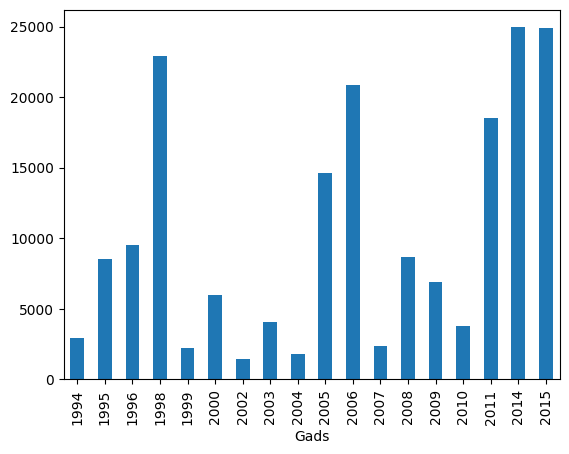

In [51]:
# let us plot average price of Impreza over years
# subaru_grouped = subaru_ads_df.groupby(["Modelis", "Gads"])["price"]
# let's get the statistics
subaru_stats = subaru_grouped.mean()
# let us see all
subaru_stats["Impreza"].plot(kind="bar")


In [53]:
# let us convert Gads to numeric
subaru_ads_df["Gads"] = pd.to_numeric(subaru_ads_df["Gads"], errors="coerce")
# let us check info
subaru_ads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   URL          180 non-null    object
 1   Description  180 non-null    object
 2   Modelis      180 non-null    object
 3   Gads         180 non-null    int64 
 4   Tilp.        180 non-null    object
 5   Nobrauk.     180 non-null    object
 6   Cena         180 non-null    object
 7   price        180 non-null    int32 
dtypes: int32(1), int64(1), object(6)
memory usage: 12.0+ KB


In [54]:
# let us describe just Gads column
subaru_ads_df["Gads"].describe()

count     180.000000
mean     2011.794444
std         6.032220
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2016.000000
max      2023.000000
Name: Gads, dtype: float64

<Axes: >

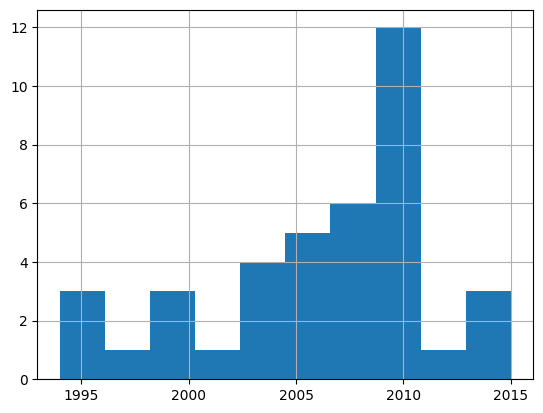

In [55]:
# let us plot histogram of imprezas by Gads
subaru_ads_df[subaru_ads_df["Modelis"] == "Impreza"]["Gads"].hist()

In [56]:
# let us simply get all Imprezas and sort by year and then by price
imprezas = subaru_ads_df[subaru_ads_df["Modelis"] == "Impreza"]
imprezas = imprezas.sort_values(["Gads", "price"])
# by default sort_values uses ascending order
# we could have specified order by using ascending parameter
# let us see years from 2003 to 2008
imprezas_2003_2008 = imprezas[imprezas["Gads"].between(2003, 2008)]
# let us see all
imprezas_2003_2008

,URL,Description,Modelis,Gads,Tilp.,Nobrauk.,Cena,price
20,https://www.ss.com/msg/lv/transport/cars/subar...,4x4 Ļoti labs stāvoklis bez rūsas. Mazs noskrē...,Impreza,2003,2.0,165 tūkst.,"1,800 €",1800
11,https://www.ss.com/msg/lv/transport/cars/subar...,Steidzami pārdodu Subaru Impreza Wrx turbo 2.0...,Impreza,2003,2.0,298 tūkst.,"3,800 €",3800
27,https://www.ss.com/msg/lv/transport/cars/subar...,Pārdodu Wrx universāli. \r\n\r\n+\r\n\r\nIegād...,Impreza,2003,2.0,270 tūkst.,"6,500 €",6500
3,https://www.ss.com/msg/lv/transport/cars/subar...,"Ir vizuāli defekti, bet nav sapuvis.",Impreza,2004,2.0,-,"1,800 €",1800
26,https://www.ss.com/msg/lv/transport/cars/subar...,Subaru Impreza Wrx ar 2.0 litru benzīndzinēju ...,Impreza,2005,2.0,-,"14,200 €",14200
2,https://www.ss.com/msg/lv/transport/cars/subar...,Pārdodu projekta auto. \r\nVirsbūve pilnībā be...,Impreza,2005,2.0,137 tūkst.,"15,000 €",15000
0,https://www.ss.com/msg/lv/transport/cars/subar...,"Subaru Impreza. Pilnpiedziņa, 4x4. 2l motors. ...",Impreza,2006,2.0,219 tūkst.,"2,700 €",2700
22,https://www.ss.com/msg/lv/transport/cars/subar...,"Pārdodu Subaru Imprezu Wrx Prodrive 2, 5 turbo...",Impreza,2006,2.5,180 tūkst.,"16,900 €",16900
9,https://www.ss.com/msg/lv/transport/cars/subar...,Subaru Impreza Sti Spec D 466hp and 601nm. 200...,Impreza,2006,2.5,202 tūkst.,"43,000 €",43000
24,https://www.ss.com/msg/lv/transport/cars/subar...,Pārdodu Imprezu 4x4 vienā gabalā par motora un...,Impreza,2007,1.5,323 tūkst.,"1,150 €",1150


In [57]:
# we can always convert our dataframe back to say list of dictionaries
imprezas_dict = imprezas_2003_2008.to_dict(orient="records")
# first 3 
imprezas_dict[:3]

[{'URL': 'https://www.ss.com/msg/lv/transport/cars/subaru/impreza/hdpjb.html',
  'Description': '4x4 Ļoti labs stāvoklis bez rūsas. Mazs noskrējiens 164.412km. Ekonomiska.',
  'Modelis': 'Impreza',
  'Gads': 2003,
  'Tilp.': '2.0',
  'Nobrauk.': '165 tūkst.',
  'Cena': '1,800  €',
  'price': 1800},
 {'URL': 'https://www.ss.com/msg/lv/transport/cars/subaru/impreza/akfoi.html',
  'Description': 'Steidzami pārdodu Subaru Impreza Wrx turbo 2.0, 225 zs, 165 kW. \r\n\r\nLabā teh',
  'Modelis': 'Impreza',
  'Gads': 2003,
  'Tilp.': '2.0',
  'Nobrauk.': '298 tūkst.',
  'Cena': '3,800  €',
  'price': 3800},
 {'URL': 'https://www.ss.com/msg/lv/transport/cars/subaru/impreza/epxii.html',
  'Description': 'Pārdodu Wrx universāli. \r\n\r\n+\r\n\r\nIegādājos pirms gandrīz 4 gadiem un pie man',
  'Modelis': 'Impreza',
  'Gads': 2003,
  'Tilp.': '2.0',
  'Nobrauk.': '270 tūkst.',
  'Cena': '6,500  €',
  'price': 6500}]

## Analyzing data with Pandas

### Learning Resources

To learn more about Pandas:

- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Pandas Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)

Alternatives to Pandas
- Polars: [Polars](https://pola.rs/)

## Visualization Options

Pandas by default uses matplotlib for plotting. 
You can also use other libraries like seaborn, plotly, bokeh, etc.
You set the plotting backend with the following code:

```python
import pandas as pd
# import matplotlib.pyplot as plt

# Set the plotting backend to use
pd.options.plotting.backend = "plotly"
```

### Plotly Visualization Library

- [Plotly](https://plotly.com/python/)
- [Plotly Express](https://plotly.com/python/plotly-express/)